# Fundamentos de Aprendizaje Automático


## Práctica 2: kNN & Regresión Logística


In [1]:
# Imports globales
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import compileall
import numpy as np
import time
import matplotlib.pyplot as plt

compileall.compile_dir('.',force=True,quiet=True)

from datos import Datos
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada
from estrategiasparticionado.validacion_simple import ValidacionSimple
from clasificadores.clasificador_vecinos_proximos import ClasificadorVecinosProximos
from plotModel import plotModel

%matplotlib inline

### Apartado 1 
#### Resultados de la clasificación mediante vecinos próximos (implementación  original)  para  diferentes valores de vecindad en los conjuntos de datos propuestos y comparación con los resultados proporcionados por scikit-learn tanto para datos normalizados como sin normalizar. 

En primer lugar vamos a comparar el rendimiento de nuestro clasificador KNN con el clasificador implementado en scikit-learn.

Vamos a hacer este experimento con ambos clasificadores para ordenes de vecindad K = 1, 3, 5, 11, 21 y 51, y con los conjuntos de datos example1.data, example2.data, example3.data y example4.data.

El método de validación en todos los casos será validación simple.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Ks = [1, 3, 5, 11, 21, 51]
indices_example = [1,2,3,4]
errores_knn_propios = {}
errores_knn_scikit = {}
normalizar_vector = [False, True]

for index,i in enumerate(indices_example):
    # Inicialización
    nombre_fichero = './conjunto_datos/example%d.data' % i
    dataset=Datos(nombre_fichero)
    estrategia = ValidacionSimple()
    
    # Configuracion implementacion propia
    estrategia.creaParticiones(dataset.datos)
    
    # Configuracion scikit
    X = dataset.datos[:,:-1]
    Y = dataset.datos[:,-1]

    Y = dataset.datos[:,-1] 
    class_names = sorted(dataset.diccionarios[-1].keys())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

    
    errores_knn_propios[nombre_fichero] = []
    errores_knn_scikit[nombre_fichero] = []

    for K in Ks:

        # Validación implementación propia con y sin normalizacion
        errores_K = []
        for normalizar in enumerate(normalizar_vector):
            
            clasificador = ClasificadorVecinosProximos(K=K,normalizar=normalizar)
            clasificador.validacion(estrategia, dataset)
            errores_K.append(clasificador.errores[0])
            
        errores_knn_propios[nombre_fichero].append(errores_K)
        
        # Validacion scikit
        model = KNeighborsClassifier(n_neighbors=K,p=2,algorithm='brute',weights='uniform')
        model.fit(X_train, Y_train)
        score = model.score(X_test, Y_test)
        errores_knn_scikit[nombre_fichero].append(1. - score)       

A continuacion se muestra el porcentaje de error para cada conjunto de datos, cada clasificador y cada configuración del mismo.

Después se muestran las respectivas fronteras de decisión generadas por cada implementación para cada conjunto de datos y cada clasificador con orden de vecindad K=5.

In [3]:
for propios, scikit in zip(errores_knn_propios.items(),errores_knn_scikit.items()):
    
    print("Conjunto de datos:",propios[0])
    print("\tErrores:")
    for index, errors in enumerate(zip(propios[1],scikit[1])):
        print("\t\tK =",Ks[index])
        print("\t\t\tPropios:\t",end="")
        
        print("\tSin normalizacion:\t",errors[0][0])
        print("\t\t\t\t\t\tCon normalizacion:\t",errors[0][1])
        print("\t\t\tScikit:\t\t\t\t\t\t",errors[1])
    print("\n")
    


Conjunto de datos: ./conjunto_datos/example1.data
	Errores:
		K = 1
			Propios:		Sin normalizacion:	 0.0
						Con normalizacion:	 0.0
			Scikit:						 0.158333333333
		K = 3
			Propios:		Sin normalizacion:	 0.09285714285714286
						Con normalizacion:	 0.075
			Scikit:						 0.108333333333
		K = 5
			Propios:		Sin normalizacion:	 0.11071428571428571
						Con normalizacion:	 0.1
			Scikit:						 0.141666666667
		K = 11
			Propios:		Sin normalizacion:	 0.11785714285714285
						Con normalizacion:	 0.10714285714285714
			Scikit:						 0.125
		K = 21
			Propios:		Sin normalizacion:	 0.15
						Con normalizacion:	 0.1357142857142857
			Scikit:						 0.158333333333
		K = 51
			Propios:		Sin normalizacion:	 0.1357142857142857
						Con normalizacion:	 0.11785714285714285
			Scikit:						 0.175


Conjunto de datos: ./conjunto_datos/example2.data
	Errores:
		K = 1
			Propios:		Sin normalizacion:	 0.0
						Con normalizacion:	 0.0
			Scikit:						 0.0
		K = 3
			Propios:		Sin normalizacion:	 0

 #### Implementación propia

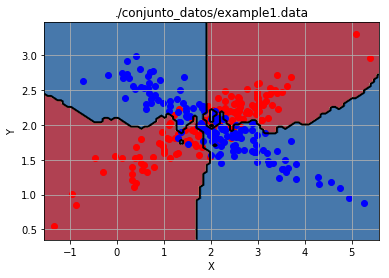

Error de ./conjunto_datos/example1.data: 0.09642857142857143
Tiempo: 11.905055


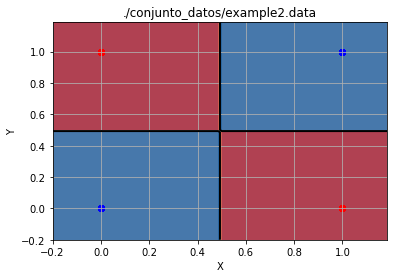

Error de ./conjunto_datos/example2.data: 0.0
Tiempo: 11.820374000000001


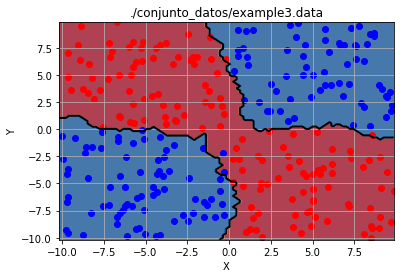

Error de ./conjunto_datos/example3.data: 0.02142857142857143
Tiempo: 11.811788999999997


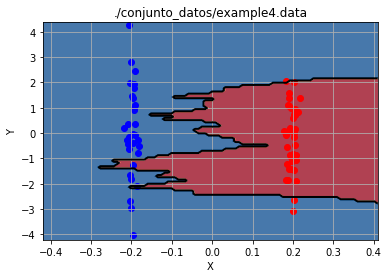

Error de ./conjunto_datos/example4.data: 0.05714285714285714
Tiempo: 3.302430000000001
Tiempo total: 38.841


In [4]:
from clasificadores.clasificador_vecinos_proximos import ClasificadorVecinosProximos

start = time.clock()

clasificador = ClasificadorVecinosProximos(normalizar=False)

for i in range(1, 5):
    step = time.clock()
    nombre_fichero = './conjunto_datos/example%d.data' % i
    
    dataset=Datos(nombre_fichero)
    estrategia = ValidacionSimple()
    
    estrategia.creaParticiones(dataset.datos)
    
    res = clasificador.validacion(estrategia, dataset)
    
    ii = estrategia.particiones[-1].indicesTrain
    
    plt.figure()
    
    plotModel(dataset.datos[ii,0], dataset.datos[ii,1], dataset.datos[ii,-1]!=0,
              clasificador, nombre_fichero, dataset.diccionarios)
    
    plt.show()
    print('Error de ./conjunto_datos/example%d.data: %s'% (i, clasificador.errores[0]))
    print("Tiempo:",time.clock() - step)
    
print("Tiempo total: %2.3f" % (time.clock()-start))

 #### Implementación scikit

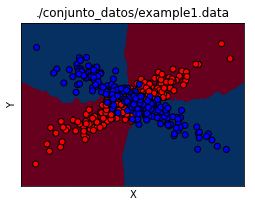

Validación simple. Error: 0.11
Tiempo: 0.7705540000000042


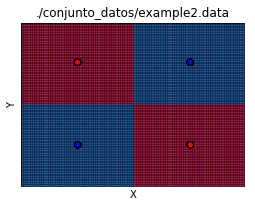

Validación simple. Error: 0.00
Tiempo: 0.31387399999999843


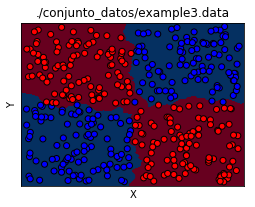

Validación simple. Error: 0.03
Tiempo: 9.219015000000006


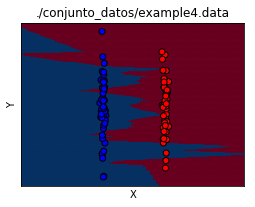

Validación simple. Error: 0.16
Tiempo: 0.4603089999999952
Tiempo total: 10.801


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from matplotlib.colors import ListedColormap

start = time.clock()
for i in range(1, 5):
    step = time.clock()
    nombre_fichero = './conjunto_datos/example%d.data' % i
    dataset=Datos(nombre_fichero)
    estrategia = ValidacionSimple()
    X = dataset.datos[:,:-1]
    Y = dataset.datos[:,-1]

    Y = dataset.datos[:,-1] 
    class_names = sorted(dataset.diccionarios[-1].keys())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=29)


    model = KNeighborsClassifier(n_neighbors=5,p=2,algorithm='brute')
    model.fit(X_train, Y_train)

    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=cm_bright)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(nombre_fichero)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    print("Validación simple. Error: %0.2f" % (1-score))
    print("Tiempo:",time.clock() - step)
    
print("Tiempo total: %2.3f" % (time.clock()-start))

### Comentario sobre los resultados

#### Conjunto de datos example1.data
Se puede observar que los errores y las fronteras de nuestra implementacion y de scikit son muy similares, y que el error es bajo, particularmente para valores de K pequeños

#### Conjunto de datos example2.data
En este caso, que se trata del problema xor, simplemente se observa que para todos los casos el error cometido es 0. es un problema sencillo para este tipo de clasificadores y asi se muestra tanto en los errores cometidos como en las fronteras generadas.

#### Conjunto de datos example3.data
Este problema se puede afirmar que es similar al anterior en estructura y dificultad, y así se refleja en las fronteras de decisión de ambos clasificadores.
El error es muy pequeño en todos los ordenes de vecindad y en todos los experimentos se ha observado que no supera el 3%.

#### Conjunto de datos example4.data
Este problema en general es bien resuelto por ambos clasificadores para ordenes pequeños de vecindad (1,3,5).
Cuando se consideran demasiados vecinos, se ha observado que en general la implementación de scikit 

#### Implementación de scikit

### Apartado b) Regresión logística
#### Implementación propia

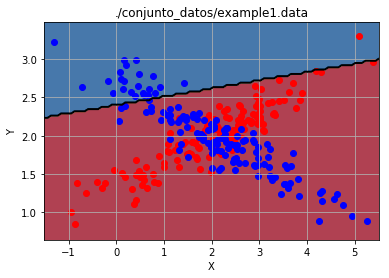

Error de ./conjunto_datos/example1.data: 0.41785714285714287
Tiempo: 1.0047799999999967


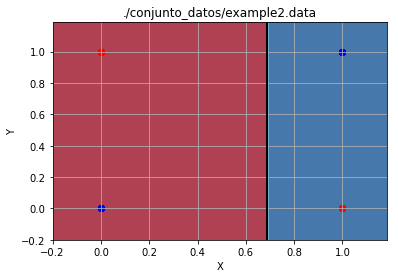

Error de ./conjunto_datos/example2.data: 0.4642857142857143
Tiempo: 0.9523860000000042


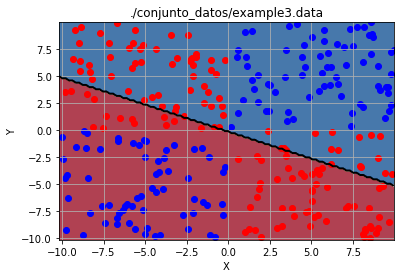

Error de ./conjunto_datos/example3.data: 0.5178571428571429
Tiempo: 1.0290479999999889


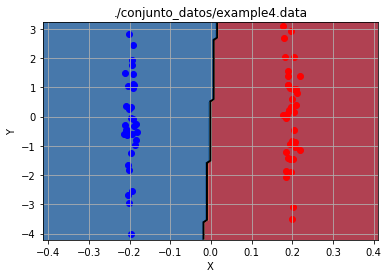

Error de ./conjunto_datos/example4.data: 0.0
Tiempo: 0.4735730000000018
Tiempo total: 3.461


In [6]:
from clasificadores.clasificador_regresion_logistica import ClasificadorRegresionLogistica

start = time.clock()
clasificador = ClasificadorRegresionLogistica()

for i in range(1, 5):
    step = time.clock()
    nombre_fichero = './conjunto_datos/example%d.data' % i
    dataset=Datos(nombre_fichero)
    estrategia = ValidacionSimple()
    res = clasificador.validacion(estrategia, dataset)
    estrategia.creaParticiones(dataset.datos)
    ii = estrategia.particiones[-1].indicesTrain
    plt.figure()
    plotModel(dataset.datos[ii,0], dataset.datos[ii,1], dataset.datos[ii,-1]!=0,
              clasificador, nombre_fichero, dataset.diccionarios)
    plt.show()
    print('Error de ./conjunto_datos/example%d.data: %s'% (i, clasificador.errores[0]))
    print("Tiempo:",time.clock() - step)
    
print("Tiempo total: %2.3f" % (time.clock()-start))



#### Implementación de scikit

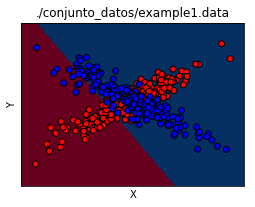

Validación simple. Error: 0.43
Tiempo: 0.42672600000000216


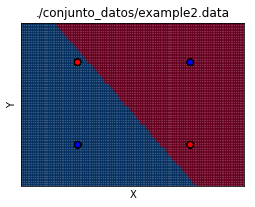

Validación simple. Error: 0.58
Tiempo: 0.3023720000000054


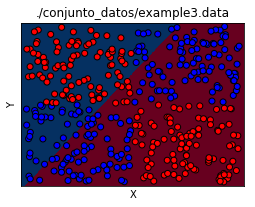

Validación simple. Error: 0.63
Tiempo: 1.1702839999999952


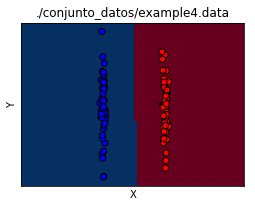

Validación simple. Error: 0.00
Tiempo: 0.21829999999999927
Tiempo total: 2.119


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from matplotlib.colors import ListedColormap

start = time.clock()

for i in range(1, 5):
    step = time.clock()
    nombre_fichero = './conjunto_datos/example%d.data' % i
    dataset=Datos(nombre_fichero)
    estrategia = ValidacionSimple()
    X = dataset.datos[:,:-1]
    Y = dataset.datos[:,-1]

    Y = dataset.datos[:,-1] 
    class_names = sorted(dataset.diccionarios[-1].keys())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=29)


    model = LogisticRegression(C=1e5)
    model.fit(X_train, Y_train)

    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=cm_bright)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(nombre_fichero)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    print("Validación simple. Error: %0.2f" % (1-score))
    print("Tiempo:",time.clock() - step)
    
print("Tiempo total: %2.3f" % (time.clock()-start))

### Comentario sobre los resultados
Se observa como para los dataset 1, 2 y 3, como no se puede separar los conjuntos por una frontera lineal, el error es bastante alto y la frontera lineal es la máxima posible dada la limitación de la frontera lineal.